## Final Project Submission

Please fill out:
* Student name: Shannon McChesney
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL: https://samcches.github.io/why_is_this_house_so_expensive



### King County Housing Data--Analysis

From the King County Housing Data, three questions relevant to invested will be posed and tested through data analysis. 

First we will import the appropriate programs/libraries to assist us in our analysis:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Next we will import the dataset,

In [3]:
kings = pd.read_csv('kc_house_data.csv')

and preview the first few lines:

In [4]:
kings.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Now that we have a preview of the data, we'll find out more information on the number of entries, the means, standard deviation, and more that we can use to formulate our questions and decide how to tidy our data before processing.

In [5]:
kings.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
kings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


From the above column data we can tell that some of the columns have missing values. We can see how many below.

In [7]:
kings.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The waterfront column contains boolean values ("Yes, it is a waterfront property" or "No, it isn't.") For practicality's sake, and since the null values make up roughly 18% of the missing values, we can go ahead and mark them as "Not Waterfront". We will use the same process for the questions of whether the property has a view or the year (if any) the property was renovated.

In [8]:
kings.waterfront.unique()
kings.waterfront.isna().sum()
kings.waterfront.replace(np.NaN, 0, inplace=True)
kings.waterfront.isna().sum()

0

In [9]:
kings.view.unique()
kings.view.isna().sum()
kings.view.replace(np.NaN, 0, inplace=True)
kings.view.isna().sum()

0

In [10]:
kings.waterfront.unique()
kings.waterfront.isna().sum()
kings.waterfront.replace(np.NaN, 0, inplace=True)
kings.waterfront.isna().sum()

0

In [11]:
kings.yr_renovated.unique()
kings.yr_renovated.replace(np.NaN, 0, inplace=True)
kings.yr_renovated.isna().sum()
kings.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [12]:
kings.sqft_basement.unique()
kings.sqft_basement.replace('?', 0, inplace=True)
kings.sqft_basement = pd.to_numeric(kings.sqft_basement, errors='coerce')

We've had to not only replace the string values with numeric values in the Sq Ft of Basement space, but also replace the float values with integers, so that we can use them in our future calculations.

In [13]:
kings.sqft_basement = [int(x) for x in kings.sqft_basement]

In [14]:
kings.sqft_basement.head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement, dtype: int64

We will also do the same (convert floats to integers) for the variable column "floors" in case we use them for future calculations.

In [17]:
kings.floors.unique()
kings.floors = [int(x) for x in kings.floors]
kings.floors.head()

0    1
1    2
2    1
3    1
4    1
Name: floors, dtype: int64

Now that we've replaced the null values, let's view the data in histograms to get a visual idea of our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x102873240>,
      dtype=object)

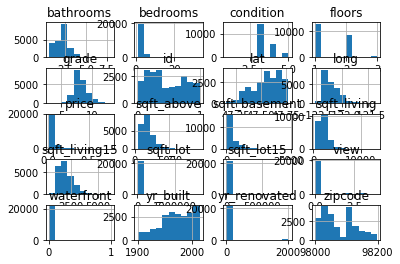

In [18]:
kings.hist()

Judging from the histograms above, the data needs to be cleaned before any relationships can be found. Some of the data, like the zipcode, needs to be modified to be categorical, while other data like Waterfront need to be changed to be boolean values.

But for now, we can start to get a general idea and begin to pose our questions.

### 1. Which Variable Best Correlates to a House's Selling Price?

Naturally, all good investors want a to make sure they eventually see a return. So, let's help them invest in the right property for their return needs.

The first question we will focus on is which of the variable best correlates to house selling price. Certain variables such as latitute and longitude are not independently useful to us, so we can go ahead and drop them from our analysis. 

In [19]:
data = kings[['price','zipcode', 'waterfront', 'sqft_living', 'grade', 'bathrooms', 'floors', 'condition', 'sqft_lot', 'yr_built', 'sqft_basement']].copy()
data.head()

,price,zipcode,waterfront,sqft_living,grade,bathrooms,floors,condition,sqft_lot,yr_built,sqft_basement
0,221900.0,98178,0.0,1180,7,1.00,1,3,5650,1955,0
1,538000.0,98125,0.0,2570,7,2.25,2,3,7242,1951,400
2,180000.0,98028,0.0,770,6,1.00,1,3,10000,1933,0
3,604000.0,98136,0.0,1960,7,3.00,1,5,5000,1965,910
4,510000.0,98074,0.0,1680,8,2.00,1,3,8080,1987,0


We will view the data in a heatmap to see the level of correlation between price and the other variables.

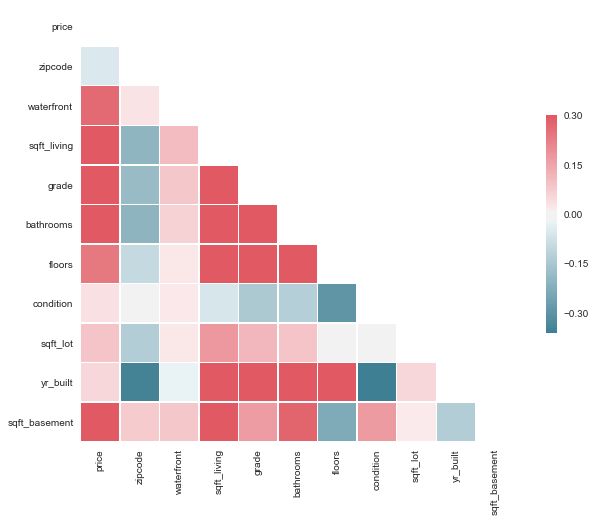

In [20]:
sns.set(style="white")


corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws= {"shrink": .5})

According to the above heatmap, there seems to be a correlation between price and the following variables: Square Feet of Living Space, Grade, Number of Bathrooms, Square Feet of Basement, and Floors. We can also see that there is a negative correlation between Year Built and Zip Code, as well as Year Built and Condition.

Now we clarify what we have seen in the heatmap, using scatterplots to see the individual spread between each of the columns above and price.

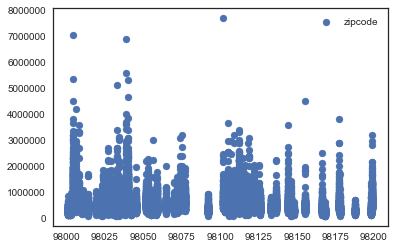

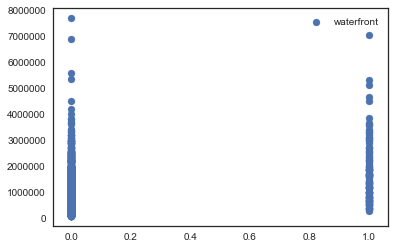

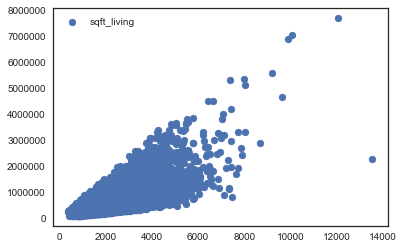

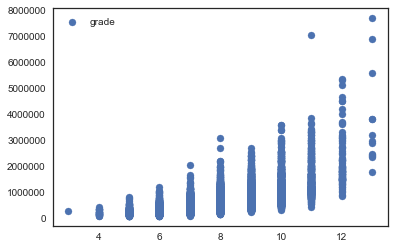

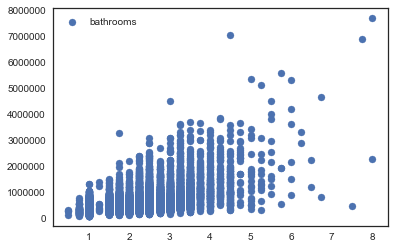

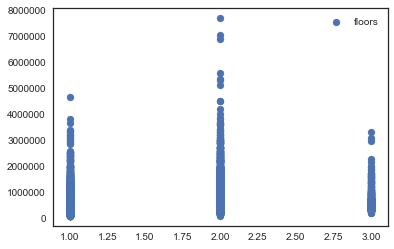

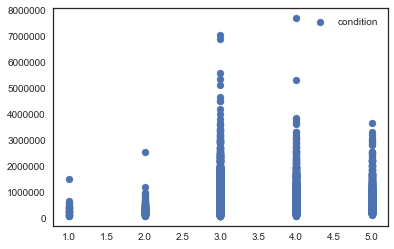

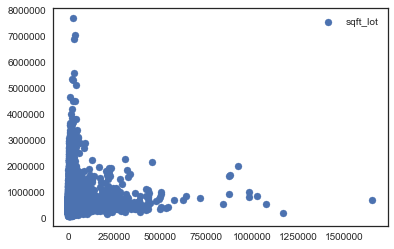

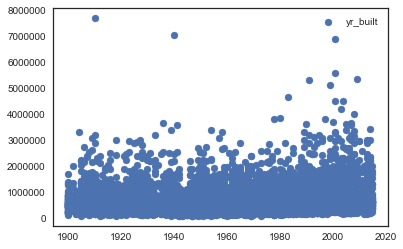

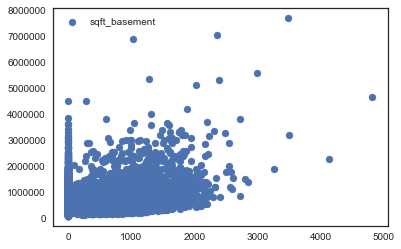

In [21]:
for column in ['zipcode', 'waterfront', 'sqft_living', 'grade', 'bathrooms', 'floors', 'condition', 'sqft_lot', 'yr_built', 'sqft_basement']:
    plt.scatter(data[column], data.price, label=column)
    plt.legend()
    plt.show()

There is a great deal of heteroscedascity in the square feet of living space, grade, and number of bathrooms scatterplots. 

In order to clean up the data, we will normalize it by subtracting the mean of the data from the data and dividing it by the standard deviation of the data column.

In [18]:
data.zipcode = (data.zipcode - data.zipcode.mean()) / data.zipcode.std()
data.waterfront = (data.waterfront - data.waterfront.mean()) / data.waterfront.std()
data.sqft_living = (data.sqft_living - data.sqft_living.mean()) / data.sqft_living.std()
data.grade = (data.grade - data.grade.mean()) / data.grade.std()
data.bathrooms = (data.bathrooms - data.bathrooms.mean()) / data.bathrooms.std()
data.floors = (data.floors - data.floors.mean()) / data.floors.std()
data.condition = (data.condition - data.condition.mean()) / data.condition.std()
data.sqft_lot = (data.sqft_lot - data.sqft_lot.mean()) / data.sqft_lot.std()
data.yr_built = (data.yr_built - data.yr_built.mean()) / data.yr_built.std()
data.sqft_basement = (data.sqft_basement - data.sqft_basement.mean()) / data.sqft_basement.std()

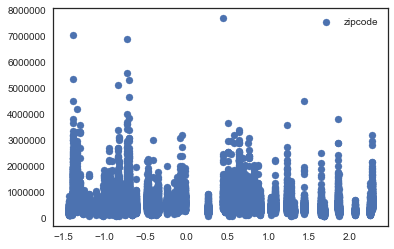

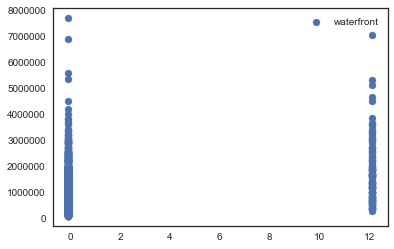

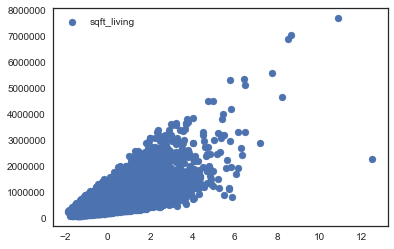

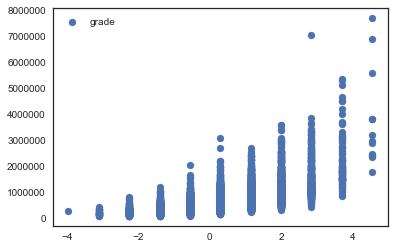

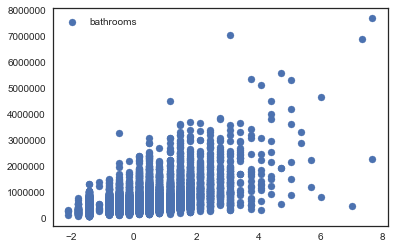

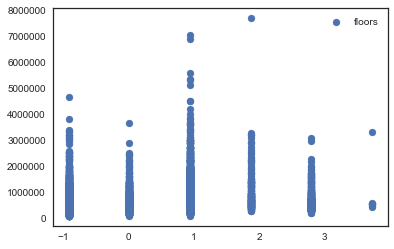

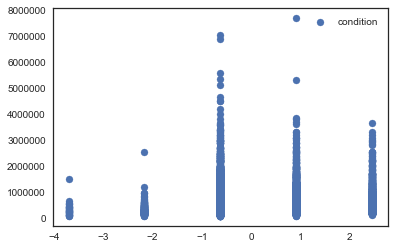

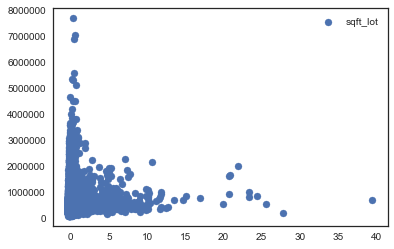

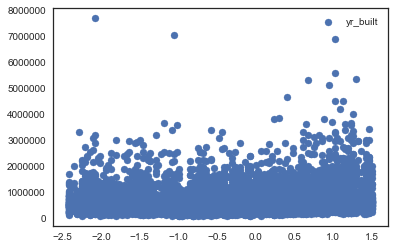

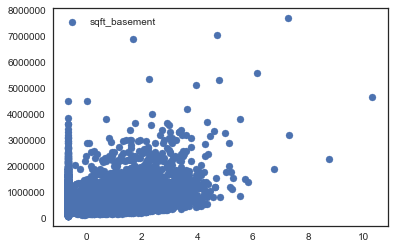

In [19]:
for column in ['zipcode', 'waterfront', 'sqft_living', 'grade', 'bathrooms', 'floors', 'condition', 'sqft_lot', 'yr_built', 'sqft_basement']:
    plt.scatter(data[column], data.price, label=column)
    plt.legend()
    plt.show()

From the scatter plots, we can see a clear linear relationship between price and square feet of living space, price and number of bathrooms, and price and grade. 

We will take a look at the correlation between price and the other variables below:

In [20]:
import math
def mean_normalize(var):

    norm = []
    n = 0
    mean = np.mean(var)
    
    for i in var:
        diff = var[n] - mean
        norm.append(diff)
        n = n + 1
    
    return norm

def correlation(var1,var2):
    if len(var1) != len(var2):
        return None
    else: 
        mean_norm_var1 = mean_normalize(var1)
        mean_norm_var2 = mean_normalize(var2)
        
        var1_dot_var2 = [a * b for a, b in list(zip(mean_norm_var1, mean_norm_var2))]
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        
        return np.round(sum(var1_dot_var2) / math.sqrt(sum(var1_squared) * sum(var2_squared)), 2)
    

correlation(data['price'], data['bathrooms'])

0.53

In [21]:
correlation(data['price'], data['sqft_living'])

0.7

In [22]:
correlation(data['price'], data['zipcode'])

-0.05

In [23]:
correlation(data['price'], data['waterfront'])

0.26

In [24]:
correlation(data['price'], data['grade'])

0.67

In [25]:
correlation(data['price'],data['floors'])

0.26

In [26]:
correlation(data['price'], data['condition'])

0.04

In [27]:
correlation(data['price'], data['sqft_lot'])

0.09

In [28]:
correlation(data['price'], data['yr_built'])

0.05

In [29]:
correlation(data['price'], data['sqft_basement'])

0.32

From the above data, we can tell that there is a slight positive correlation between between price and the number of bathrooms. There is also a moderate positive correlation between price and grade, price and square feet of basement space, and price and the square footage of living space. So far the strongest indicator of home price is the amount of square footage in the living area at a correlation of 0.7. However, any correlation lower than .85 isn't really enough for us to confidently say that there is a strong correlation between the two variables.

This follows what one would expect. However, it may be surprising to some that condition has such a weak correlation. It may be surprising to some that the number of bathrooms correlate to house price as much as they do.

Below we will focus on the strongest correlating variables that we have: grade, sqft_living, sqft_basement, and number of bathrooms.

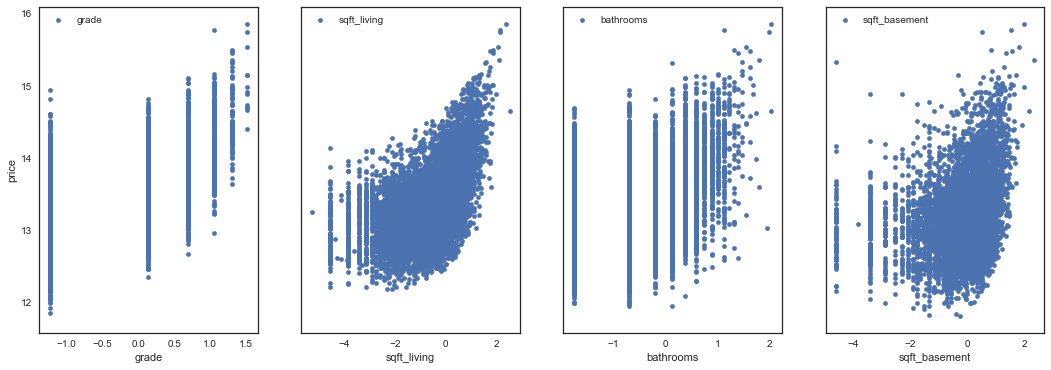

In [47]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18,6))
for idx, channel in enumerate(['grade', 'sqft_living', 'bathrooms', 'sqft_basement']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
f1 = 'price~grade'
f2 = 'price~sqft_living'
f3 = 'price~bathrooms'
f4 = 'price~sqft_basement'

model1 = smf.ols(formula=f1, data=data).fit()
model2 = smf.ols(formula=f2, data=data).fit()
model3 = smf.ols(formula=f3, data=data).fit()
model4 = smf.ols(formula=f4, data=data).fit()

In [49]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     5957.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        17:28:58   Log-Likelihood:                -4737.4
No. Observations:               10315   AIC:                             9479.
Df Residuals:                   10313   BIC:                             9493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.5471      0.005   2980.664      0.000      13.538      13.556
grade          0.3490      0.005     77.182      0.000       0.340       0.358
==============================================================================
Omnibus:                      233.859   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.890
Skew:                           0.316   Prob(JB):                     4.54e-61
Kurtosis:                       3.497   Cond. No.                         1.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the OLS Regression Analysis of the relationship between price and grade, the R-Squared Value of .44 indicates that although there may seem to be a relationship between price and grade, it is statistically insignificant. The Jarque-Bera (JB) results show an extremely high level of deviation.

In [50]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     3427.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        17:29:07   Log-Likelihood:                -4947.3
No. Observations:                9138   AIC:                             9899.
Df Residuals:                    9136   BIC:                             9913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.5191      0.005   2750.784      0.000      13.509      13.529
sqft_living     0.2176      0.004     58.542      0.000       0.210       0.225
==============================================================================
Omnibus:                      172.888   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.154
Skew:                           0.334   Prob(JB):                     1.69e-40
Kurtosis:                       3.186   Cond. No.                         1.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS Regression Analysis of the relationship between price and square feet of living space appeared to be the most promising from our previous analyses. Here, however, we see that the R-Squared value of .493 is hardly any improvement on the relationship between price and grade. 

The Jarque-Bera score is also far too high. 

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     2340.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        17:29:13   Log-Likelihood:                -7316.5
No. Observations:               11239   AIC:                         1.464e+04
Df Residuals:                   11237   BIC:                         1.465e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4134      0.005   2470.748      0.000      13.403      13.424
bathrooms      0.2810      0.006     48.371      0.000       0.270       0.292
==============================================================================
Omnibus:                      294.495   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.995
Skew:                           0.393   Prob(JB):                     3.27e-70
Kurtosis:                       3.253   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, the relationship between price and the number of bathrooms is even weaker than the previous two relationships, as indicated by the R-Squared value of .277. The Jarque-Bera score is also much higher than the other two relationships.

In [52]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     720.3
Date:                Tue, 07 May 2019   Prob (F-statistic):          1.75e-151
Time:                        17:29:20   Log-Likelihood:                -5456.4
No. Observations:                7396   AIC:                         1.092e+04
Df Residuals:                    7394   BIC:                         1.093e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.2377      0.006   2218.098      0.000      13.226      13.249
sqft_basement     0.1533      0.006     26.838      0.000       0.142       0.165
==============================================================================
Omnibus:                      412.473   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.794
Skew:                           0.551   Prob(JB):                    1.34e-113
Kurtosis:                       3.688   Cond. No.                         1.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see the lowest of the four R-Squared values with the relationship between Price and Square Feet of Basement space, and another very high Jarque-Berea score.

Next, we will view the "goodness of fit" between the independent and dependant variables for each of our three columns.

      grade
0 -1.232432
1  1.515881
0    13.116971
1    14.076146
dtype: float64


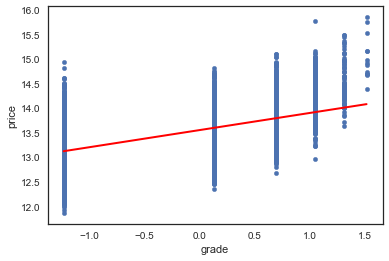

In [53]:
X_new1 = pd.DataFrame({'grade': [data.grade.min(), data.grade.max()]})
print(X_new1.head())

preds = model1.predict(X_new1)
print(preds)

data.plot(kind='scatter', x='grade', y='price')
plt.plot(X_new1, preds, c='red', linewidth=2)
plt.show()

In [ ]:
X_new2 = pd.DataFrame({'sqft_living': [data.sqft_living.min(), data.sqft_living.max()]})
print(X_new2.head())

preds = model2.predict(X_new2)
print(preds)


data.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new2, preds, c='red', linewidth=2)
plt.show()

   bathrooms
0  -2.101247
1   7.651878
0    1.343335e+05
1    2.018647e+06
dtype: float64


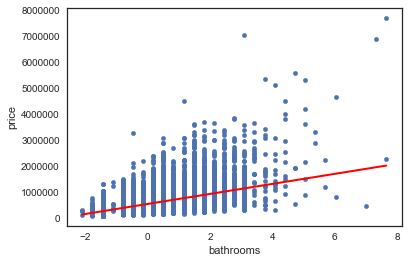

In [40]:
X_new3 = pd.DataFrame({'bathrooms': [data.bathrooms.min(), data.bathrooms.max()]})
print(X_new3.head())

preds = model3.predict(X_new3)
print(preds)


data.plot(kind='scatter', x='bathrooms', y='price')
plt.plot(X_new3, preds, c='red', linewidth=2)
plt.show()

   sqft_basement
0      -0.649622
1      10.309411
0    4.636641e+05
1    1.756443e+06
dtype: float64


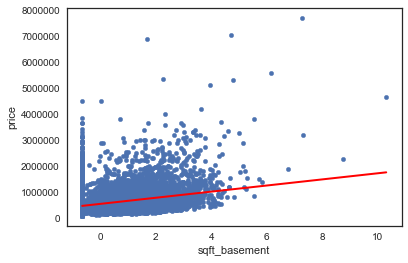

In [41]:
X_new4 = pd.DataFrame({'sqft_basement': [data.sqft_basement.min(), data.sqft_basement.max()]})
print(X_new4.head())

preds = model4.predict(X_new4)
print(preds)


data.plot(kind='scatter', x='sqft_basement', y='price')
plt.plot(X_new4, preds, c='red', linewidth=2)
plt.show()

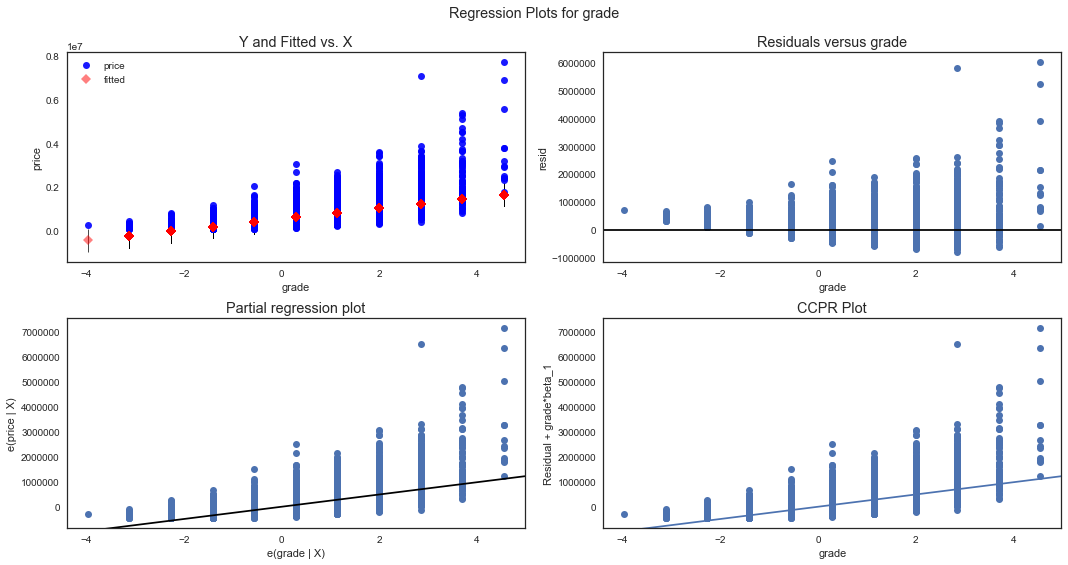

In [42]:
fig1 = plt.figure(figsize=(15,8))
fig1 = sm.graphics.plot_regress_exog(model1, "grade", fig=fig1)
plt.show()

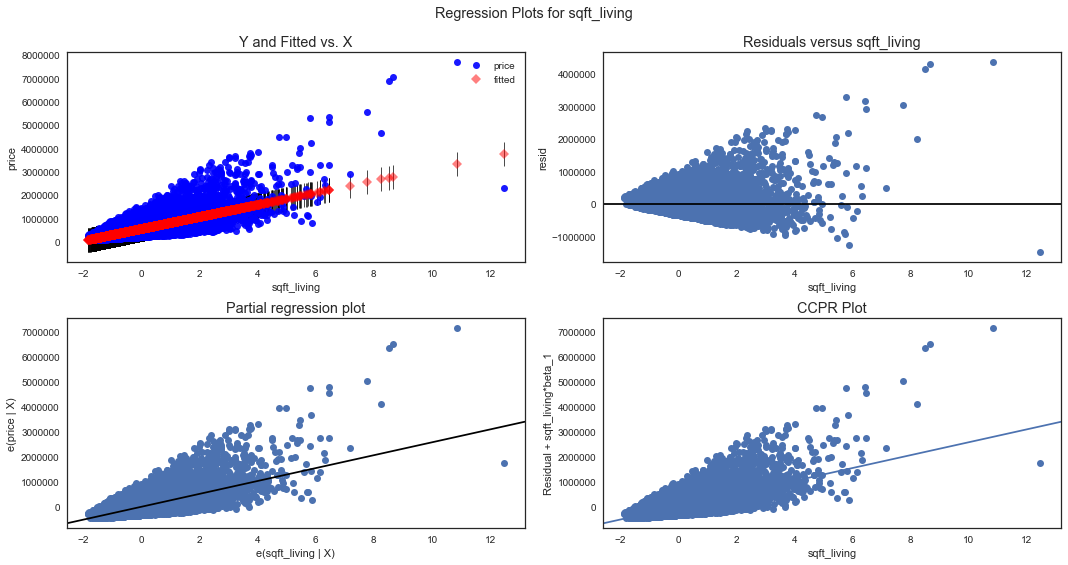

In [43]:
fig2 = plt.figure(figsize=(15,8))
fig2 = sm.graphics.plot_regress_exog(model2, "sqft_living", fig=fig2)
plt.show()

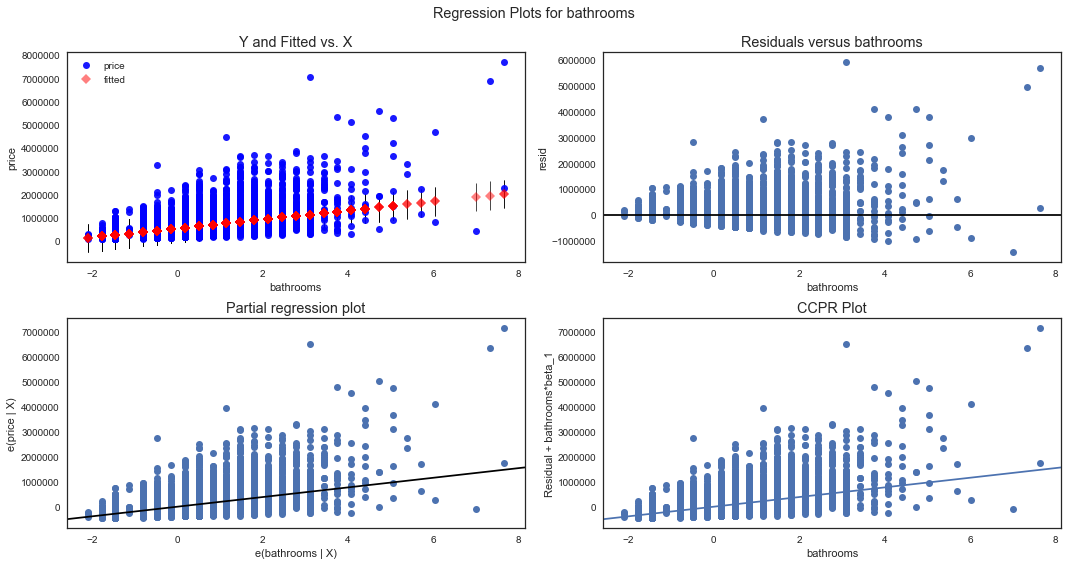

In [44]:
fig3 = plt.figure(figsize=(15,8))
fig3 = sm.graphics.plot_regress_exog(model3, "bathrooms", fig=fig3)
plt.show()

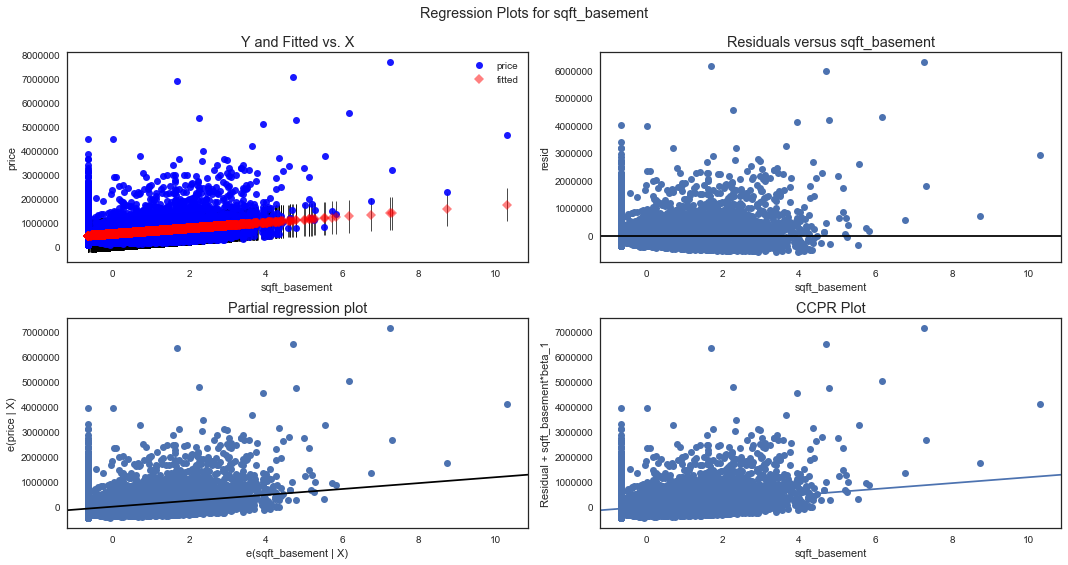

In [45]:
fig4 = plt.figure(figsize=(15,8))
fig4 = sm.graphics.plot_regress_exog(model4, "sqft_basement", fig=fig4)
plt.show()

From the above regression models, we can see that there is a poorness of fit between price and the independent variables (grade, square feet of living space, and number of bathrooms).

Below we will apply log to minimize the effects of skewedness on the variables.

As a final step, we will test/train our data with our most promising three categories. We will do this using a k-folds cross-validation analysis.

In [44]:
X = data[['bathrooms', 'sqft_living', 'grade', 'sqft_basement']]
y = pd.DataFrame(data.price, columns = ['price'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)



16197 5400 16197 5400


In [45]:
def kfolds(data, k):
    
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds =[]
    start_obs = 0
    for fold_n in range(1, k+1):
        if fold_n <= leftovers:
            fold = data.iloc[start_obs : start_obs+fold_size+1]
            folds.append(fold)
            start_obs += fold_size + 1
        else: 
            fold = data.iloc[start_obs : start_obs + fold_size]
            folds.append(fold)
            start_obs += fold_size
              
    return folds

In [46]:
data = pd.concat([X.reset_index(drop=True), y], axis=1)
folds = kfolds(data, 3)

In [47]:
test_errs = []
train_errs = []
k=3

for n in range(k):
    
    train = pd.concat([fold for i, fold in enumerate(folds) if i!=n])
    test = folds[n]
    
    linreg.fit(train[X.columns], train[y.columns])
    
    y_hat_train = linreg.predict(train[X.columns])
    y_hat_test = linreg.predict(test[X.columns])
    train_residuals = y_hat_train - train[y.columns]
    test_residuals = y_hat_test - test[y.columns]
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[price    5.940693e+10
dtype: float64, price    6.211671e+10
dtype: float64, price    6.303404e+10
dtype: float64]
[price    6.592586e+10
dtype: float64, price    6.043250e+10
dtype: float64, price    5.876053e+10
dtype: float64]


In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_3_results = cross_val_score(linreg, X, y, cv=3, scoring='neg_mean_squared_error')

cv_3_results

array([-6.59258634e+10, -6.04325027e+10, -5.87605302e+10])

In [49]:
correlation(data['price'], data['grade'])

0.67

In [50]:
correlation(data['price'], data['sqft_living'])

0.7

In [51]:
correlation(data['price'], data['bathrooms'])

0.53

From our above test/train data we can see that our algorithm fits the model as expected. 

/Users/shannonamcchesney/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


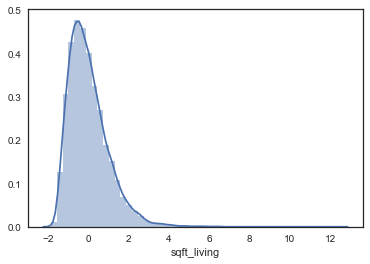

In [52]:
import seaborn as sns
sns.distplot(data['sqft_living'], bins=50, kde=True)

Finally, we can see that square feet of living space forms a nice positively-skewed, single-peaked bell curve with a long tail containing outliers. This single peak means that our data is pretty evenly distributed. 

None of the variables independently have an R-Squared Value high enough for it to be used in a predictive model. Let's see what happens when we combine them.

In [53]:
import statsmodels.formula.api as smf
new_model = 'price ~ bathrooms + sqft_living + grade'
smf.ols(formula=new_model, data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     8359.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        20:26:39   Log-Likelihood:            -2.9907e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21593   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.403e+05   1700.458    317.736      0.000    5.37e+05    5.44e+05
bathrooms    -2.95e+04   2656.592    -11.103      0.000   -3.47e+04   -2.43e+04
sqft_living  1.865e+05   3065.098     60.855      0.000    1.81e+05    1.93e+05
grade        1.227e+05   2690.247     45.626      0.000    1.17e+05    1.28e+05
==============================================================================
Omnibus:                    16926.041   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008526.554
Skew:                           3.291   Prob(JB):                         0.00
Kurtosis:                      35.824   Cond. No.                         3.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-Squared Value (0.54) here is a great improvement on the R-Squared Value of each individual variable, but it's still too low to be considered a working model (>=0.85), so let's try adding some of the variables with lower correlations.

In [54]:
new_model = 'price ~ bathrooms + sqft_living + grade + sqft_basement'
smf.ols(formula=new_model, data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6438.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        20:26:45   Log-Likelihood:            -2.9891e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.403e+05   1688.369    320.011      0.000    5.37e+05    5.44e+05
bathrooms     -2.857e+04   2638.227    -10.830      0.000   -3.37e+04   -2.34e+04
sqft_living    1.612e+05   3365.173     47.898      0.000    1.55e+05    1.68e+05
grade          1.358e+05   2771.224     48.992      0.000     1.3e+05    1.41e+05
sqft_basement  3.431e+04   1944.601     17.644      0.000    3.05e+04    3.81e+04
==============================================================================
Omnibus:                    17045.994   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1060027.018
Skew:                           3.314   Prob(JB):                         0.00
Kurtosis:                      36.676   Cond. No.                         3.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-Squared Value (0.54) here is a great improvement on the R-Squared Value of each individual variable, but it's still too low to be considered a working model (>=0.85), so let's try adding some of the variables with lower correlations.

In [58]:
newmodel = 'price ~ bathrooms + sqft_basement + grade + sqft_living + floors'
smf.ols(formula=newmodel, data=data).fit().summary()

PatsyError: Error evaluating factor: NameError: name 'floors' is not defined
    price ~ bathrooms + sqft_basement + grade + sqft_living + floors
                                                              ^^^^^^